In [27]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'movies.csv')

In [28]:
df = pd.read_csv('movies.csv')

# Specify the new order of columns
new_order = ['budget', 'company', 'country', 'director', 'genre', 'gross', 'name', 'rating', 'released', 'runtime', 'score', 'star', 'votes', 'writer', 'year']

# Rearrange the columns
df = df[new_order]

In [29]:
#data
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000.0,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772.0,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980
1,4500000.0,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106.0,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980
2,18000000.0,Lucasfilm,United States,Irvin Kershner,Action,538375067.0,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980
3,3500000.0,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539.0,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980
4,6000000.0,Orion Pictures,United States,Harold Ramis,Comedy,39846344.0,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,7000.0,NaN,United States,Joseph Ebanks,Drama,NaN,More to Life,NaN,"October 23, 2020 (United States)",90.0,3.1,Shannon Bond,18.0,Joseph Ebanks,2020
7664,NaN,Cactus Blue Entertainment,United States,Dusty Dukatz,Comedy,NaN,Dream Round,NaN,"February 7, 2020 (United States)",90.0,4.7,Michael Saquella,36.0,Lisa Huston,2020
7665,58750.0,Embi Productions,United States,Nkanya Nkwai,Drama,NaN,Saving Mbango,NaN,"April 27, 2020 (Cameroon)",NaN,5.7,Onyama Laura,29.0,Lynno Lovert,2020
7666,15000.0,NaN,United States,James Randall,Drama,NaN,It's Just Us,NaN,"October 1, 2020 (United States)",120.0,NaN,Christina Roz,NaN,James Randall,2020


In [30]:
# write a loop to see any data is missing
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

budget - 28%
company - 0%
country - 0%
director - 0%
genre - 0%
gross - 2%
name - 0%
rating - 1%
released - 0%
runtime - 0%
score - 0%
star - 0%
votes - 0%
writer - 0%
year - 0%


In [31]:
#see data types
print(df.dtypes)

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime     float64
score       float64
star         object
votes       float64
writer       object
year          int64
dtype: object


<Axes: >

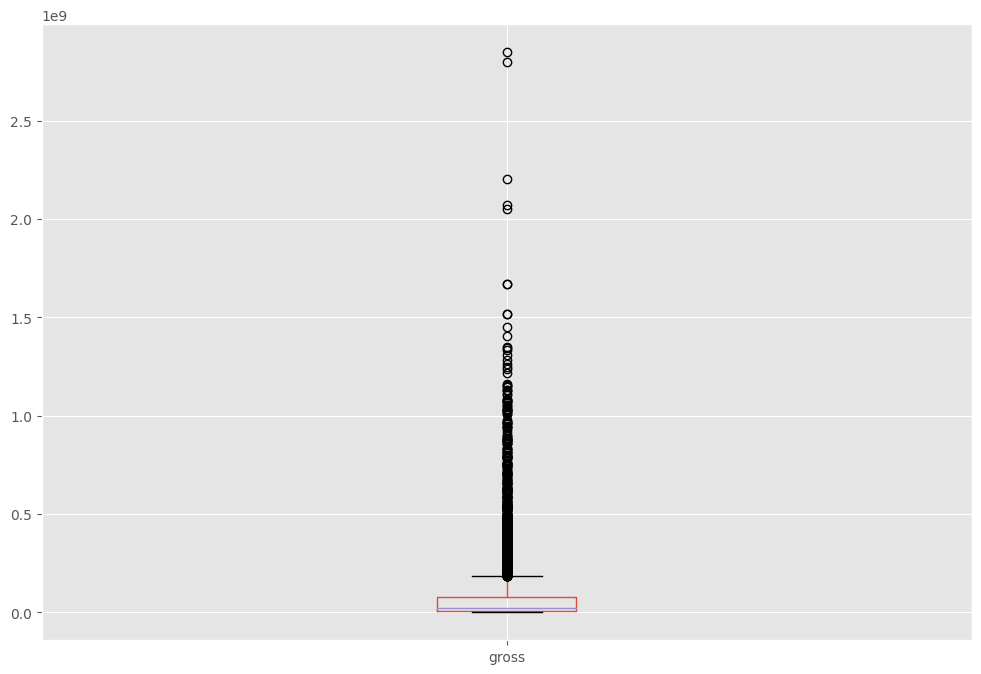

In [32]:
# see ooutliers
df.boxplot(column=['gross'])

In [33]:
df.drop_duplicates()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000.0,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772.0,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980
1,4500000.0,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106.0,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980
2,18000000.0,Lucasfilm,United States,Irvin Kershner,Action,538375067.0,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980
3,3500000.0,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539.0,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980
4,6000000.0,Orion Pictures,United States,Harold Ramis,Comedy,39846344.0,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,7000.0,NaN,United States,Joseph Ebanks,Drama,NaN,More to Life,NaN,"October 23, 2020 (United States)",90.0,3.1,Shannon Bond,18.0,Joseph Ebanks,2020
7664,NaN,Cactus Blue Entertainment,United States,Dusty Dukatz,Comedy,NaN,Dream Round,NaN,"February 7, 2020 (United States)",90.0,4.7,Michael Saquella,36.0,Lisa Huston,2020
7665,58750.0,Embi Productions,United States,Nkanya Nkwai,Drama,NaN,Saving Mbango,NaN,"April 27, 2020 (Cameroon)",NaN,5.7,Onyama Laura,29.0,Lynno Lovert,2020
7666,15000.0,NaN,United States,James Randall,Drama,NaN,It's Just Us,NaN,"October 1, 2020 (United States)",120.0,NaN,Christina Roz,NaN,James Randall,2020


In [34]:
#order our data
df.sort_values(by=['gross'], inplace=False, ascending=False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
5445,237000000.0,Twentieth Century Fox,United States,James Cameron,Action,2.847246e+09,Avatar,PG-13,"December 18, 2009 (United States)",162.0,7.8,Sam Worthington,1100000.0,James Cameron,2009
7445,356000000.0,Marvel Studios,United States,Anthony Russo,Action,2.797501e+09,Avengers: Endgame,PG-13,"April 26, 2019 (United States)",181.0,8.4,Robert Downey Jr.,903000.0,Christopher Markus,2019
3045,200000000.0,Twentieth Century Fox,United States,James Cameron,Drama,2.201647e+09,Titanic,PG-13,"December 19, 1997 (United States)",194.0,7.8,Leonardo DiCaprio,1100000.0,James Cameron,1997
6663,245000000.0,Lucasfilm,United States,J.J. Abrams,Action,2.069522e+09,Star Wars: Episode VII - The Force Awakens,PG-13,"December 18, 2015 (United States)",138.0,7.8,Daisy Ridley,876000.0,Lawrence Kasdan,2015
7244,321000000.0,Marvel Studios,United States,Anthony Russo,Action,2.048360e+09,Avengers: Infinity War,PG-13,"April 27, 2018 (United States)",149.0,8.4,Robert Downey Jr.,897000.0,Christopher Markus,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,7000.0,NaN,United States,Joseph Ebanks,Drama,NaN,More to Life,NaN,"October 23, 2020 (United States)",90.0,3.1,Shannon Bond,18.0,Joseph Ebanks,2020
7664,NaN,Cactus Blue Entertainment,United States,Dusty Dukatz,Comedy,NaN,Dream Round,NaN,"February 7, 2020 (United States)",90.0,4.7,Michael Saquella,36.0,Lisa Huston,2020
7665,58750.0,Embi Productions,United States,Nkanya Nkwai,Drama,NaN,Saving Mbango,NaN,"April 27, 2020 (Cameroon)",NaN,5.7,Onyama Laura,29.0,Lynno Lovert,2020
7666,15000.0,NaN,United States,James Randall,Drama,NaN,It's Just Us,NaN,"October 1, 2020 (United States)",120.0,NaN,Christina Roz,NaN,James Randall,2020


<Axes: xlabel='gross', ylabel='budget'>

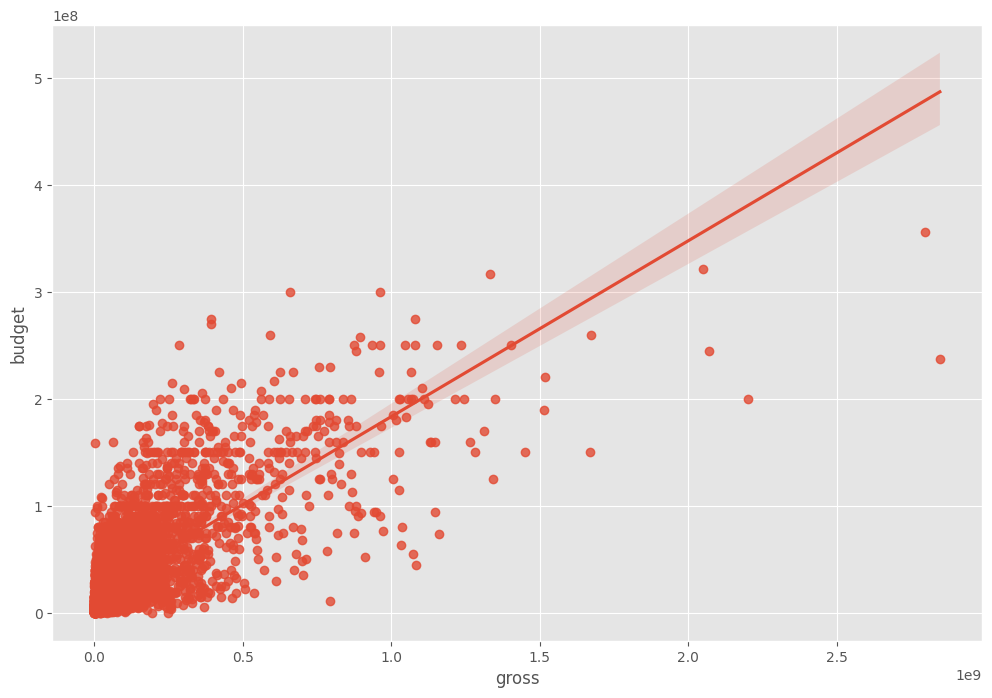

In [35]:
#create a scatter plot of budget versus gross
sns.regplot(x="gross", y="budget", data=df)

<Axes: xlabel='score', ylabel='gross'>

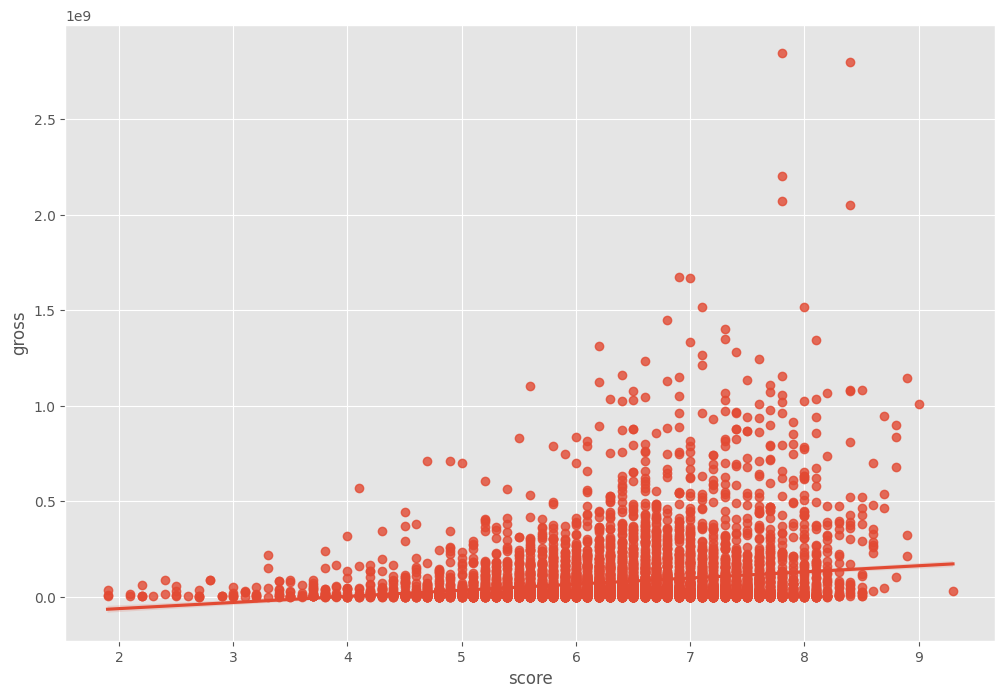

In [36]:
sns.regplot(x="score", y="gross", data=df)

In [37]:
#correlation atrix between all columns
correlation_matrix = df.corr(numeric_only = True, method = 'pearson')
correlation_matrix

,budget,gross,runtime,score,votes,year
budget,1.000000,0.740395,0.320447,0.076254,0.442429,0.329321
gross,0.740395,1.000000,0.245216,0.186258,0.630757,0.257486
runtime,0.320447,0.245216,1.000000,0.399451,0.309212,0.120811
score,0.076254,0.186258,0.399451,1.000000,0.409182,0.097995
votes,0.442429,0.630757,0.309212,0.409182,1.000000,0.222945
year,0.329321,0.257486,0.120811,0.097995,0.222945,1.000000


In [38]:
correlation_matrix1 = df.corr(numeric_only = True, method ='kendall')
correlation_matrix1


,budget,gross,runtime,score,votes,year
budget,1.000000,0.512637,0.235483,-0.000566,0.353702,0.224120
gross,0.512637,1.000000,0.168933,0.086046,0.548899,0.200618
runtime,0.235483,0.168933,1.000000,0.283611,0.198240,0.097184
score,-0.000566,0.086046,0.283611,1.000000,0.300115,0.067652
votes,0.353702,0.548899,0.198240,0.300115,1.000000,0.331465
year,0.224120,0.200618,0.097184,0.067652,0.331465,1.000000


In [39]:
correlation_matrix2 = df.corr(numeric_only = True, method ='spearman')
correlation_matrix2

,budget,gross,runtime,score,votes,year
budget,1.000000,0.693670,0.336370,-0.001403,0.502466,0.317336
gross,0.693670,1.000000,0.246243,0.126116,0.742050,0.293084
runtime,0.336370,0.246243,1.000000,0.399857,0.290159,0.142977
score,-0.001403,0.126116,0.399857,1.000000,0.428138,0.099045
votes,0.502466,0.742050,0.290159,0.428138,1.000000,0.469829
year,0.317336,0.293084,0.142977,0.099045,0.469829,1.000000


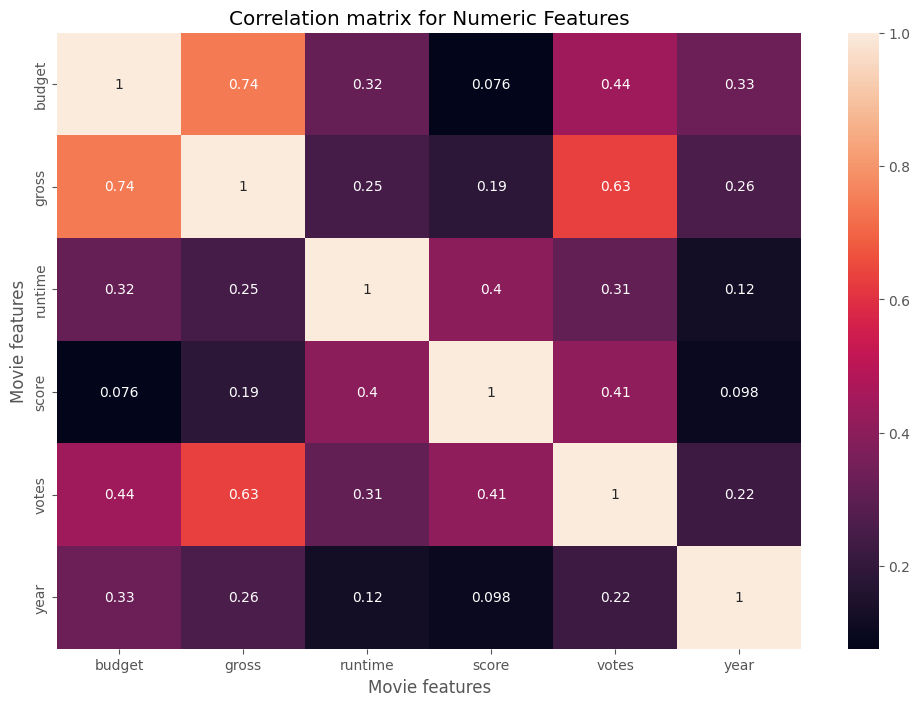

In [40]:
# Generating and visualizing a correlation matrix heatmap for numeric features in the DataFrame

correlation_matrix = df.corr(numeric_only = True, method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [41]:
 df.apply(lambda x: pd.factorize(x)[0]).corr(numeric_only = True, method = 'pearson')

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
budget,1.000000,-0.092249,-0.082082,0.106617,0.073008,0.285832,0.277488,0.193353,0.285691,0.112097,-0.012642,0.107991,0.398519,0.187238,0.300621
company,-0.092249,1.000000,0.226346,0.552258,0.009566,0.588156,0.591667,-0.028035,0.607954,0.005137,-0.028432,0.527116,0.008900,0.546151,0.601571
country,-0.082082,0.226346,1.000000,0.155471,-0.015795,0.133982,0.142828,0.000494,0.148468,0.124154,0.023097,0.182045,-0.045914,0.157202,0.140216
director,0.106617,0.552258,0.155471,1.000000,0.047288,0.750911,0.745905,0.085520,0.770876,-0.011070,-0.022687,0.682385,0.192220,0.748340,0.770497
genre,0.073008,0.009566,-0.015795,0.047288,1.000000,0.038616,0.036367,-0.086723,0.035940,0.001462,-0.002437,0.038649,0.023285,0.033688,0.037184
gross,0.285832,0.588156,0.133982,0.750911,0.038616,1.000000,0.947324,0.158582,0.976423,0.042978,-0.047041,0.735680,0.286180,0.805576,0.980873
name,0.277488,0.591667,0.142828,0.745905,0.036367,0.947324,1.000000,0.143938,0.959015,0.048955,-0.046733,0.731565,0.287776,0.805211,0.965761
rating,0.193353,-0.028035,0.000494,0.085520,-0.086723,0.158582,0.143938,1.000000,0.146606,0.032741,0.012595,0.093116,0.099972,0.103623,0.156713
released,0.285691,0.607954,0.148468,0.770876,0.035940,0.976423,0.959015,0.146606,1.000000,0.048235,-0.045761,0.754468,0.299905,0.819617,0.993190
runtime,0.112097,0.005137,0.124154,-0.011070,0.001462,0.042978,0.048955,0.032741,0.048235,1.000000,0.026436,0.035392,0.106024,0.032264,0.050647


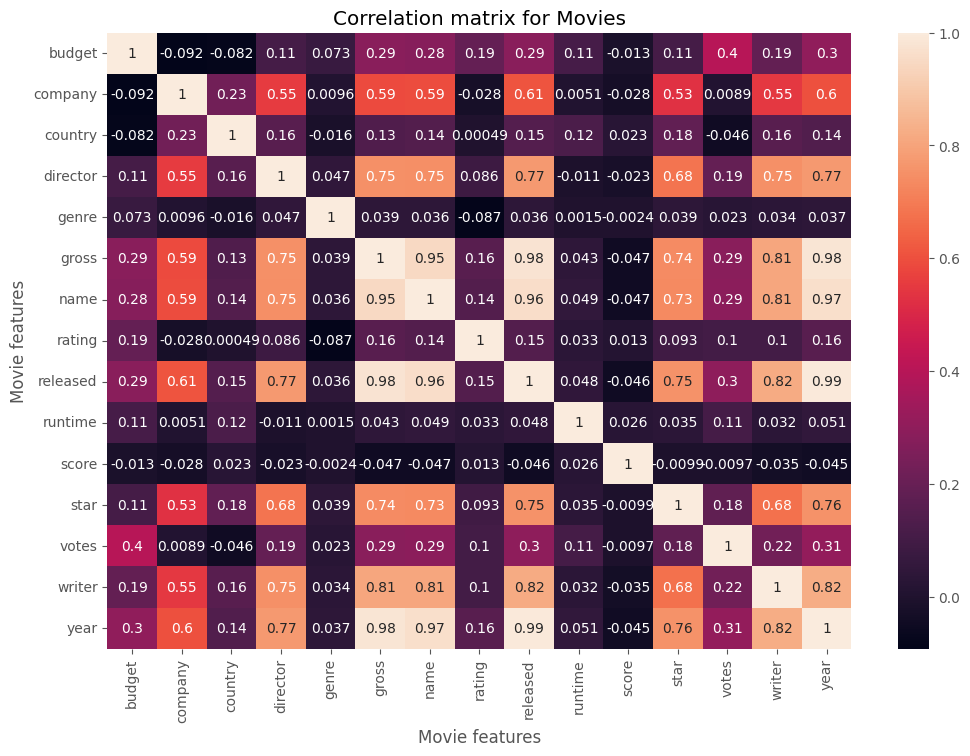

In [42]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(numeric_only = True,method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

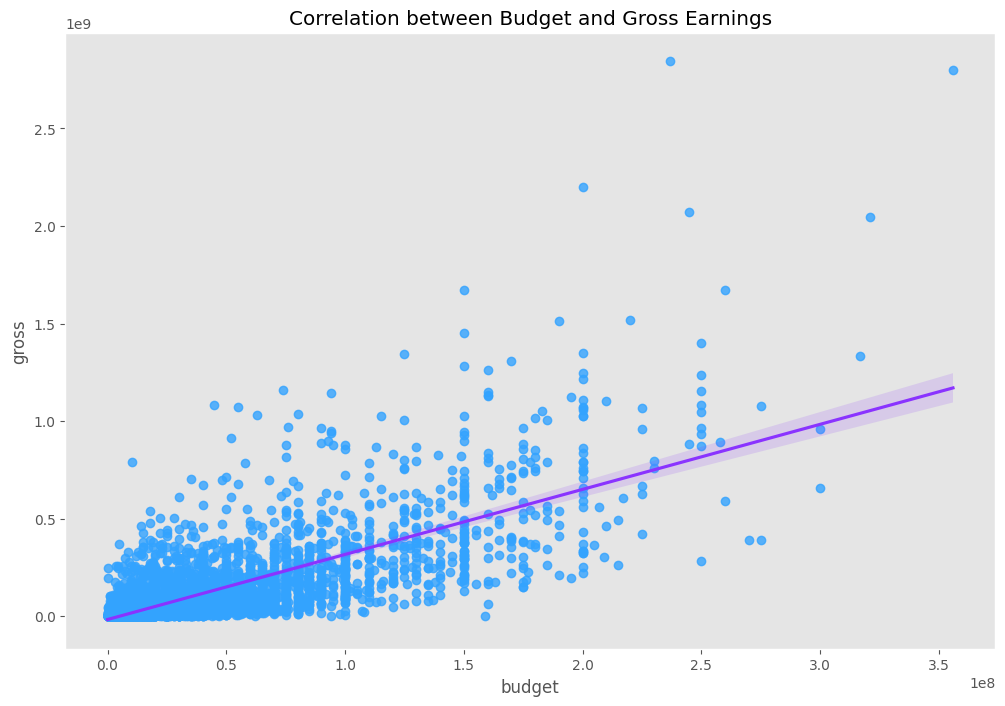

In [43]:
sns.regplot(x = 'budget', y = 'gross',
            data = df,
            scatter_kws = {'color' : '#33A3FF'},
            line_kws = {'color' : '#8A33FF'})

plt.title('Correlation between Budget and Gross Earnings')
plt.grid(False)

plt.show()

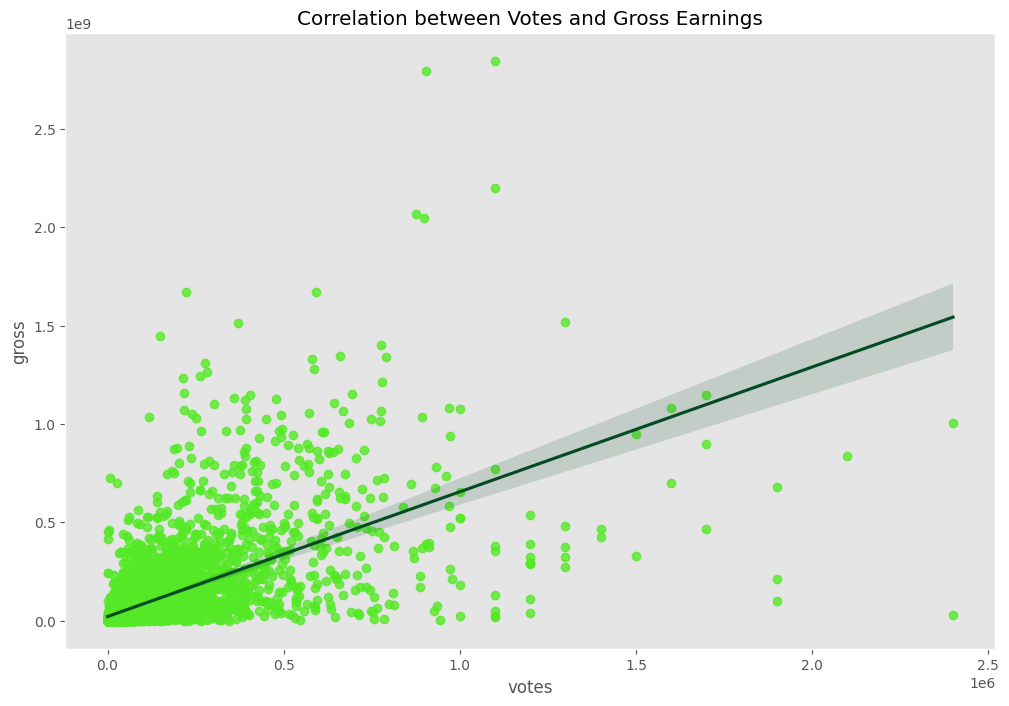

In [44]:
sns.regplot(x = 'votes', y = 'gross',
            data = df,
            scatter_kws = {'color': '#55E927'},
            line_kws = {'color' : '#044A23'})

plt.title('Correlation between Votes and Gross Earnings')
plt.grid(False)

plt.show()

In [45]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

budget  budget      1.000000
        company    -0.092249
        country    -0.082082
        director    0.106617
        genre       0.073008
                      ...   
year    score      -0.044981
        star        0.756400
        votes       0.312401
        writer      0.824770
        year        1.000000
Length: 225, dtype: float64


In [46]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

budget    company    -0.092249
company   budget     -0.092249
genre     rating     -0.086723
rating    genre      -0.086723
budget    country    -0.082082
                        ...   
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
Length: 225, dtype: float64


In [47]:
#display pairs having corelation greater than 0.5
correlation_pairs = correlation_matrix.unstack()
correlation_pairs.sort_values()[correlation_pairs.sort_values() > 0.5]

company   star        0.527116
star      company     0.527116
writer    company     0.546151
company   writer      0.546151
director  company     0.552258
                        ...   
          director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
Length: 71, dtype: float64

In [48]:
#  top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

array([<Axes: ylabel='gross'>], dtype=object)

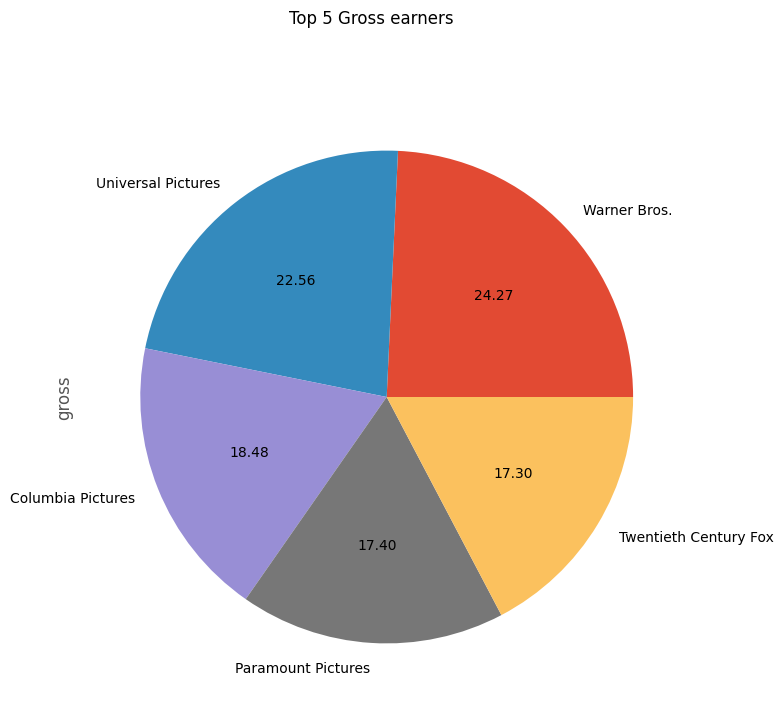

In [50]:
df1 = pd.DataFrame(CompanyGrossSumSorted)
df1.head().plot(kind = 'pie', autopct = '%.2f', subplots = True, legend = False, title = 'Top 5 Gross earners')

In [ ]:
## Highest Gross Earnings by Company in any year

Gross_Revenue_Year = df.groupby(['company', 'year'])[['gross']].sum()
Gross_Revenue_Year

In [ ]:
Sorted_Gross_Yearly = Gross_Revenue_Year.sort_values('gross', ascending = False)[:15]
Sorted_Gross_Yearly = Sorted_Gross_Yearly['gross'].astype('int64')
Sorted_Gross_Yearly

In [ ]:
df['Year'] = df['released'].astype(str).str[:4]
df

In [ ]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

In [ ]:
df_numerized.corr(method='pearson')

In [ ]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [ ]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes
        

In [ ]:
df

In [ ]:
sns.swarmplot(x="rating", y="gross", data=df)

In [ ]:
sns.stripplot(x="rating", y="gross", data=df)